In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

In [2]:
def mandelbrot_point(c, n_iterations, threshold=2):
    z = 0
    n = 0 
    for n in range(n_iterations):
        z = z**2 + c

        # threshold - usually 2
        if abs(z) > threshold:
            break
    return n

def mandelbrot(x_start, x_end, y_start, y_end, x_resolution, n_iterations, threshold):
    y_resolution = int(x_resolution*(y_end-y_start)/(x_end-x_start))
    points_to_draw = np.zeros((y_resolution, x_resolution))
    coordinates = [[0] * y_resolution for _ in range(x_resolution)]

    for x in range(x_resolution):
        for y in range(y_resolution):
            c = (x_end - x_start) * x/x_resolution + x_start + ((y_end - y_start) * -y/y_resolution + y_end)*1j
            # save threshold point as pixel value
            points_to_draw[y][x] = mandelbrot_point(c, n_iterations, threshold)
            coordinates[y][x] = (c.real, c.imag)

    plt.imshow(points_to_draw, cmap='hot', extent=(x_start, x_end, y_start, y_end))
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.show()

    return points_to_draw, coordinates

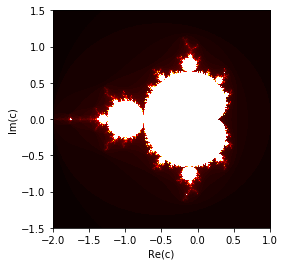

In [3]:
mandelbrot(x_start = -2, 
           x_end = 1, 
           y_start = -1.5001, 
           y_end = 1.5, 
           x_resolution = 1000, 
           n_iterations = 100,
           threshold = 2)

In [3]:
from numpy import random

def monte_carlo_mandelbrot(x_values, y_values, iterations):
    in_area = 0
    x_in_area = []
    y_in_area = []
    
    for i in range(len(x_values)):
        c = x_values[i] + y_values[i]*1j
        # print(i)

        if mandelbrot_point(c, iterations) == iterations - 1:
            x_in_area.append(x_values[i])
            y_in_area.append(y_values[i])
            in_area += 1

    return in_area, x_in_area, y_in_area

In [4]:
def random_sampling(s, i, x_start, x_end, y_start, y_end):
    x_values = random.uniform(x_start, x_end, s)
    y_values = random.uniform(y_start, y_end, s)
    
    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

    # print(f"Area = {area}")
    # plt.scatter(x_in_area, y_in_area)
    # plt.show()

    return area

# random_sampling(s = 50000,
#                 i = 1000,
#                 x_start = -2,
#                 x_end = 1,
#                 y_start = -1.5001,
#                 y_end = 1.5)

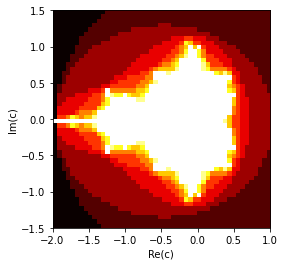

1.5152296320000027

In [18]:
%matplotlib inline

def pre_select(mandelbrot_results, s, i, buffer=1):
    values, coordinates = mandelbrot_results
    search_blocks = []
    x_block = (coordinates[0][1][0]-coordinates[0][0][0])
    y_block = (coordinates[0][0][1]-coordinates[1][0][1])

    for column in range(len(values)):
        for row in range(len(values[column])):
            if values[column][row] >= n_iterations - 2:
                x_coor, y_coor = coordinates[column][row]

                for buffer_x in range(-buffer,buffer+1):
                    for buffer_y in range(-buffer,buffer+1):
                        new_block_x = x_coor + buffer_x*x_block
                        new_block_y = y_coor + buffer_y*y_block

                        already_in_list = False
                        for elem in search_blocks:
                            if abs(new_block_x-elem[0]) < x_block/10 and abs(new_block_y-elem[1]) < y_block/10:
                                already_in_list = True
                        
                        if not already_in_list:
                            search_blocks.append((new_block_x, new_block_y))
                
    x_values = []
    y_values = []

    for _ in range(s):
        block_coordinates = search_blocks[random.randint(0, len(search_blocks))]
        x_coor = block_coordinates[0]
        y_coor = block_coordinates[1]

        x_values.append(random.uniform(block_coordinates[0]-x_block/2, block_coordinates[0]+x_block/2))
        y_values.append(random.uniform(block_coordinates[1]-y_block/2, block_coordinates[1]+y_block/2))

    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)    
    area = x_block*y_block*len(search_blocks)*in_area/float(s)

#     print(f"Area = {area}")
#     plt.scatter(x_values, y_values, color='lightgrey', label='Search Area')
#     plt.scatter(x_in_area, y_in_area, label='Mandelbrot Area')
#     plt.legend()
#     plt.show()

    return area

x_resolution = 50
n_iterations = 10

mandelbrot_results = mandelbrot(x_start = -2, 
                                x_end = 1, 
                                y_start = -1.5, 
                                y_end = 1.5, 
                                x_resolution = x_resolution, 
                                n_iterations = n_iterations,
                                threshold = 2)

pre_select(mandelbrot_results, 50000, 1000, 1)

In [7]:
def s_i_balancing(j_vals, max_i, s, n):

    area_is = random_sampling(s = s,
                            i = max_i,
                            x_start = -2,
                            x_end = 1,
                            y_start = -1.5001,
                            y_end = 1.5)


    mean_area_error = []
    std_area_error = []
    for j in j_vals:

        print(j)
        area_errors = []
        for _ in range(n):
            print(_)

            area_js = random_sampling(s = s,
                                    i = int(j),
                                    x_start = -2,
                                    x_end = 1,
                                    y_start = -1.5001,
                                    y_end = 1.5)


            area_errors.append(area_js - area_is)

        mean_area_error.append(np.mean(area_errors))
        std_area_error.append(np.std(area_errors))
    


    return j_vals, mean_area_error, std_area_error



In [49]:
result1 = s_i_balancing(np.arange(1, 1010, 10), 1000, 10000, 50)


1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
11
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
31
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
41
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
51
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
61
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


49
571
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
581
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
591
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
601
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
611
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
621
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
631
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
4

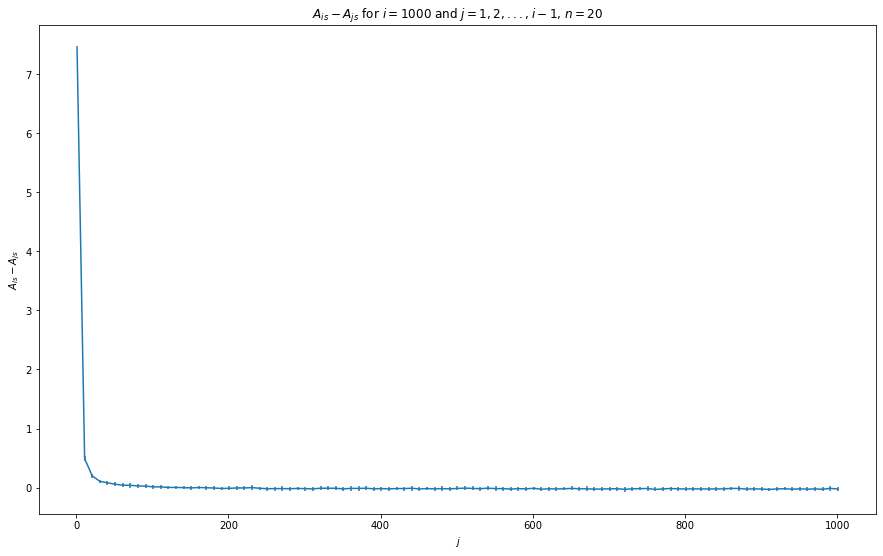

In [44]:
result1 = [[   1,   11,   21,   31,   41,   51,   61,   71,   81,   91,  101,
        111,  121,  131,  141,  151,  161,  171,  181,  191,  201,  211,
        221,  231,  241,  251,  261,  271,  281,  291,  301,  311,  321,
        331,  341,  351,  361,  371,  381,  391,  401,  411,  421,  431,
        441,  451,  461,  471,  481,  491,  501,  511,  521,  531,  541,
        551,  561,  571,  581,  591,  601,  611,  621,  631,  641,  651,
        661,  671,  681,  691,  701,  711,  721,  731,  741,  751,  761,
        771,  781,  791,  801,  811,  821,  831,  841,  851,  861,  871,
        881,  891,  901,  911,  921,  931,  941,  951,  961,  971,  981,
        991, 1001], [7.465748849999999, 0.4900483343999998, 0.19723257419999984, 0.10510550339999987, 0.07945464839999991, 0.05742191399999991, 0.039763325399999896, 0.0380352677999999, 0.027684922799999914, 0.023922797399999897, 0.011304376799999911, 0.011178372599999924, 0.00129604319999991, 0.0029160971999999097, -0.002286076200000089, -0.005850195000000089, 0.0003780125999998951, -0.003402113400000113, -0.00788426280000011, -0.015804526800000086, -0.012924430800000093, -0.006984232800000085, -0.006570219000000091, -0.0008280276000000919, -0.012330411000000102, -0.02064668820000011, -0.01771259040000008, -0.017784592800000106, -0.020142671400000083, -0.014940498000000088, -0.0189186306000001, -0.022410747000000102, -0.011772392400000076, -0.011430381000000071, -0.012528417600000097, -0.022554751800000092, -0.013734457800000075, -0.015300510000000123, -0.011124370800000095, -0.022032734400000097, -0.017694589800000098, -0.022932764400000097, -0.017172572400000093, -0.017118570600000084, -0.011574385800000097, -0.023814793800000088, -0.01794659820000008, -0.021960732000000115, -0.0184326144000001, -0.022104736800000094, -0.015120504000000068, -0.010152338400000085, -0.014976499200000081, -0.019278642600000086, -0.01040434680000009, -0.017712590400000092, -0.018918630600000107, -0.0258128604000001, -0.018918630600000087, -0.023166772200000095, -0.011988399600000102, -0.02847694920000007, -0.02077269240000008, -0.023670789000000098, -0.0214927164000001, -0.014274475800000089, -0.02107870260000008, -0.021276709200000105, -0.0267488916000001, -0.024894829800000094, -0.021924730800000097, -0.02066468880000008, -0.029862995400000106, -0.02187072900000008, -0.01841461380000007, -0.01661455380000008, -0.03166305540000011, -0.022806760200000085, -0.016794559800000105, -0.021312710400000087, -0.02532684420000007, -0.022014733800000075, -0.023940798000000103, -0.024390813000000088, -0.02352678420000011, -0.022716757200000087, -0.014670489000000097, -0.015894529800000105, -0.026118870600000094, -0.02221274040000008, -0.025524850800000092, -0.0321490716000001, -0.02304076800000011, -0.020862695400000103, -0.02719890660000008, -0.02190673020000007, -0.02705490180000008, -0.023058768600000085, -0.028674955800000103, -0.014040468000000077, -0.025362845400000108], [0.0, 0.03677115054850272, 0.03831253810193783, 0.029109975710877575, 0.03341429225057579, 0.03185394232316212, 0.034466185552947684, 0.04086723358003544, 0.032764335903575095, 0.030452466836444023, 0.03246459985640633, 0.03414808708507654, 0.0332222811024751, 0.030438349283740222, 0.030681498624080913, 0.033345473820825915, 0.027599146623051463, 0.03179707527792011, 0.036971654903835166, 0.029500210144886983, 0.03434378623728117, 0.034771717599119595, 0.02851447881907291, 0.037480966718792204, 0.026522801415415555, 0.031296935642549074, 0.033721922593675395, 0.038330104168420066, 0.031427877436120064, 0.02543950358004314, 0.03402755741725874, 0.027676032259538436, 0.03566111036896247, 0.03739329502161475, 0.034717758666618415, 0.029228900704521745, 0.03992190989018843, 0.039583315307093934, 0.03383431006468836, 0.03204017807033791, 0.034677963186059396, 0.033790938045976375, 0.029008814418196253, 0.03452808351563936, 0.04305983195231523, 0.029985568917273716, 0.030769660365000773, 0.036870045052187626, 0.03831305822391734, 0.03156484125245317, 0.033231467291513814, 0.029573095840951056, 0.032768390331455045, 0.03309912913010856, 0.032923466464361166, 0.0362940665797307, 0.036341820539507616, 0.034965413729408854, 0.03529150187399491, 0.034989670738516776, 0.02826348719316007, 0.03437207853351645, 0.035156439100506386, 0.035174135059651376, 0.025900630428770083, 0.03381239622877717, 0.033164653452379435, 0.03932122195557306, 0.036983694754392366, 0.030610871095718105, 0.033985762052437224, 0.035902042144503106, 0.038208659724104505, 0.03672574593113862, 0.030000693388213207, 0.040259503893793826, 0.032857722497609425, 0.029925752528425907, 0.034093255199951406, 0.03751535789665449, 0.03384161152330102, 0.03376742240859447, 0.03880622101974289, 0.028781968730793698, 0.033368670208725804, 0.03315657749091464, 0.028056260875151503, 0.03988406960134547, 0.027317943276307124, 0.030421780879801366, 0.03303135114363051, 0.03258458648112708, 0.03147069150273594, 0.02898079270178001, 0.031908971644940845, 0.03796275328843779, 0.03516269198368212, 0.0288127086204118, 0.030414095231147794, 0.036704896296500346, 0.03608197258433731]]

plt.figure(figsize = (15,9))

plt.errorbar(result1[0], result1[1], yerr = result1[2])
plt.title(r'$A_{is} - A_{js}$ for $i = 1000$ and $j = 1,2,..., i-1$, $n = 20$' )
plt.ylabel(r'$A_{is} - A_{js}$')
plt.xlabel(r'$j$')
plt.show()


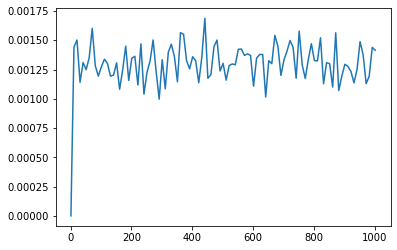

In [45]:
# 95% confidence interval 
Stds = result1[2]
CIs = list(map(lambda x:(1.96*x)/50, result1[2]))
plt.plot(result1[0], CIs)
plt.show()

In [12]:
# Do this again for max j = 100, now computing every j value. 
result2 = s_i_balancing(np.arange(1, 101), 100, 10000, 50)


1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
6
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
7
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
8
0
1


20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
59
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
60
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
61
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
62
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
64
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
65
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19

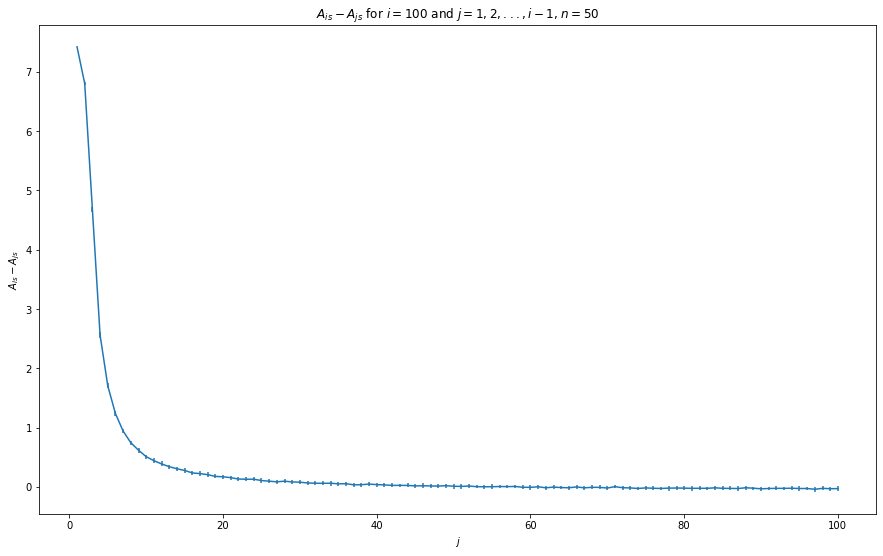

In [42]:
result2 = [[ 1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], [7.420747349999999, 6.802624746599999, 4.677923925599999, 2.5596853199999994, 1.7036847875999999, 1.2344091456, 0.9395593175999999, 0.7434427806000001, 0.6174025793999999, 0.5087149565999999, 0.44092469699999987, 0.38587886219999995, 0.33985132799999995, 0.30419213939999995, 0.2760572015999999, 0.23429580959999993, 0.222937431, 0.20450481659999997, 0.1758298608, 0.16882762739999996, 0.15471515699999996, 0.13118837279999998, 0.12809226959999997, 0.12839827979999996, 0.10553751779999997, 0.09518717279999998, 0.08418880619999994, 0.09527717579999996, 0.08193873119999999, 0.07785259499999996, 0.06467615579999997, 0.060716023799999984, 0.059491982999999936, 0.06048201599999998, 0.04980766019999997, 0.052615753799999984, 0.033481116000000005, 0.03522717419999998, 0.04649554979999999, 0.03679322639999999, 0.03232907759999999, 0.02394079800000001, 0.02446281539999999, 0.0234727824, 0.015246508199999976, 0.017604586799999992, 0.014796493199999974, 0.012186406199999982, 0.019116637199999988, 0.009450314999999994, 0.006984232799999983, 0.012852428399999987, 0.0026640887999999883, 0.000630020999999994, 0.0017460581999999736, 0.004950164999999984, 0.003186106199999985, 0.006336211199999977, -0.007920264000000005, -0.008820294000000027, 0.000468015599999978, -0.0164525484, -0.004824160799999988, -0.012186406200000005, -0.016290543000000005, -0.0016020534000000008, -0.01765858860000002, -0.008280276000000008, -0.009720324000000008, -0.02048468279999999, 0.002592086399999993, -0.0156245208, -0.018990633000000003, -0.027954931799999992, -0.018108603600000012, -0.0246428214, -0.027306910200000024, -0.022140738000000007, -0.02019667320000001, -0.0223927464, -0.025650855000000014, -0.0246968232, -0.025434847800000014, -0.01657855260000001, -0.02538084600000001, -0.026640888, -0.02907096899999999, -0.015822527400000005, -0.023238774599999998, -0.033391113, -0.0284769492, -0.025560852000000023, -0.026226874199999986, -0.02390479680000003, -0.028530951000000027, -0.028422947400000002, -0.04158138599999999, -0.025542851400000007, -0.03225707519999998, -0.029880996000000003], [0.0, 0.02135275603974737, 0.043234518439265415, 0.052138078370996946, 0.04268376119976546, 0.04343266891976884, 0.03886497536410654, 0.03566731111580762, 0.0423046614727834, 0.033888150622633936, 0.03718866890864153, 0.04279784513576167, 0.032651619740290225, 0.03457216155096975, 0.03997594062760653, 0.03446700814329962, 0.0387294318694003, 0.04019066404752535, 0.034799289542561875, 0.03579680347654098, 0.032775059268496845, 0.03840357875782147, 0.030724888729485082, 0.035943826872955734, 0.03562837163216881, 0.03208531084021745, 0.03373045878427501, 0.03541364042590061, 0.03235252199684759, 0.03479346492726766, 0.028980971590247907, 0.03225384557799927, 0.030493489257431672, 0.04109265345674458, 0.032687131877004526, 0.033143699763214095, 0.02899884927741629, 0.03751430848176716, 0.03209189959946039, 0.0353937938985667, 0.03358298378684427, 0.03491930821873127, 0.02850791001377231, 0.03423799295281198, 0.0331584586376865, 0.03866240591487235, 0.038720608613132125, 0.039109885848887645, 0.03408657800044626, 0.042124961660653756, 0.03648600400329754, 0.02700452387761386, 0.029746207996594883, 0.03353683761999043, 0.03727228855690348, 0.02497498110575879, 0.030021746918108914, 0.030765210883808257, 0.03401827664191324, 0.03904097345217507, 0.03446362364578082, 0.031872775491555067, 0.034405527696531255, 0.031688833145593794, 0.03648719843916686, 0.03461421771870023, 0.030968822558630812, 0.037009951515799513, 0.0352287884222389, 0.03064099757274102, 0.029267802105626566, 0.03396382668256374, 0.037265698403799334, 0.03105477055199543, 0.031604583886711106, 0.0324085243929639, 0.03105017930751393, 0.04039600950258616, 0.028591594567177418, 0.03302589660182172, 0.03968519987463575, 0.030356590977404653, 0.02997886849946353, 0.033139241486409315, 0.03085830000401784, 0.032221074, 0.03743140262742882, 0.03424426214794645, 0.027318061887321745, 0.03358269915824254, 0.024431635550342994, 0.031544735451506954, 0.030090634490943947, 0.03628010101044367, 0.03710493067598496, 0.02908536591508335, 0.03850151191170242, 0.034933636930589755, 0.03514100718405222, 0.03612294820207446]]

plt.figure(figsize = (15,9))
CI_95 = list(map(lambda x:(1.96*x)/np.sqrt(50), result2[2]))
plt.errorbar(result2[0], result2[1], yerr = result2[2])

plt.title(r'$A_{is} - A_{js}$ for $i = 100$ and $j = 1,2,..., i-1$, $n = 50$' )
plt.ylabel(r'$A_{is} - A_{js}$')
plt.xlabel(r'$j$')
plt.show()

In [5]:
# To investigate the confidence interval with increasing S, we choose i = 50 as from the previous figure it seems Ais - Ajs
# is stable there. 
import csv

def area_simulation_random(i, range_s, n, filename): 
    
    header = ['s'] + list(range(1, n +1))
    with open(f'results/{filename}.csv', 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(header)
    
    data = []

    for s in range_s:
        print(s)
        areas = []
        for _ in range(n):
            area = random_sampling(  s = s,
                                    i = i,
                                    x_start = -2,
                                    x_end = 1,
                                    y_start = -1.5001,
                                    y_end = 1.5)
            areas.append(area)

        with open(f'results/{filename}.csv', 'a', newline = '') as f:
            writer = csv.writer(f)
            writer.writerow([s] + areas)
            
    pass 
        
    
        
            


In [38]:
area_simulation_random(50, np.arange(1, 100100, 100), 30, 'data3')

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901
10001
10101
10201
10301
10401
10501
10601
10701
10801
10901
11001
11101
11201
11301
11401
11501
11601
11701
11801
11901
12001
12101
12201
12301
12401
12501
12601
12701
12801
12901
13001
13101
13201
13301
13401
13501
13601
13701
13801
13901
14001
14101
14201
14301
14401
14501
14601
14701
14801
14901
15001
15101
15201
15301
15401
15501
15601
15701
15801
15901
16001
16101
16201
16301
16401
16501
16601
16701
16801
16901
17001
17101
17201
17301
17401
17501
17601
17701
17801
17901
18001
18101
18201
18301
18401
18

KeyboardInterrupt: 

In [6]:
import pandas as pd
import seaborn as sns

def lineplot_area(filename):
    plt.figure(figsize = (15,10))

    df = pd.read_csv(f'results/{filename}.csv')
    df2 = pd.melt(df, id_vars = ['s'], var_name = 'Sample', value_name = 'Area')
    ax = sns.lineplot(data = df2, x = 's', y = 'Area', ci = 95)
    
def CI_plot(filename):
    plt.figure(figsize = (15,10))

    df = pd.read_csv(f'results/{filename}.csv', header = 0, index_col = 0)
    df2 = pd.DataFrame(df.std(axis = 1), columns = ['Sample std'])
    df2['Length of 95% CI'] = (2 * (1.96 * df2['Sample std']) / np.sqrt(30))
    sns.scatterplot(data = df2, x = df2.index, y = 'Length of 95% CI')


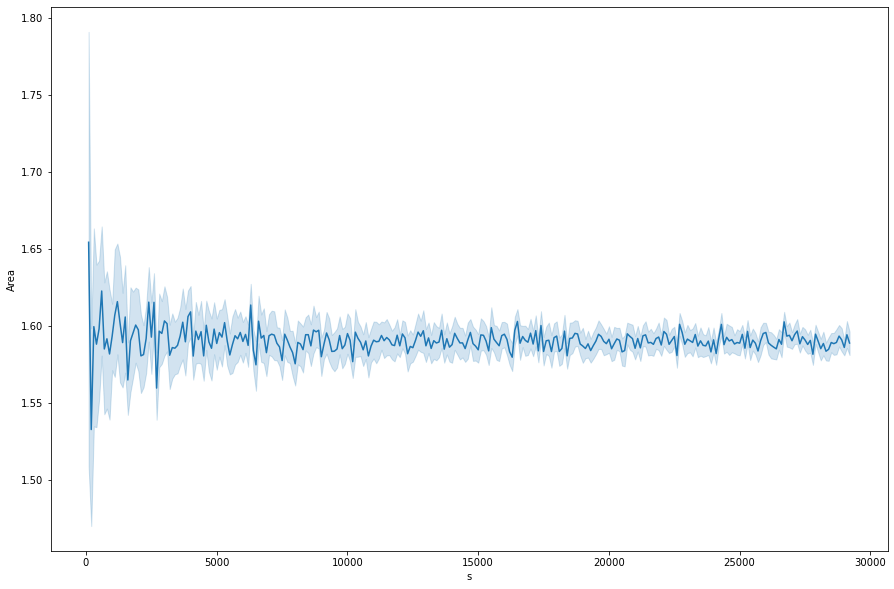

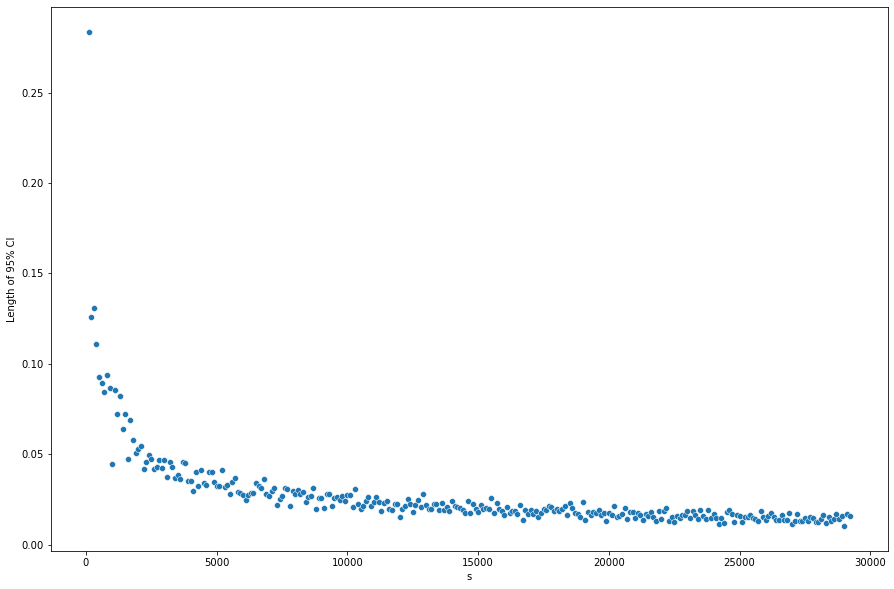

In [83]:
lineplot_area('data3')
CI_plot('data3')


In [7]:
def latin_hypercube(s, i, x_start, x_end, y_start, y_end):
    x_bins = np.linspace(x_start, x_end, s+1)
    y_bins = np.linspace(y_start, y_end, s+1)
    x_values = []
    y_values = []

    for n in range(s):
        x_values.append(random.uniform(x_bins[n], x_bins[n+1]))
        y_values.append(random.uniform(y_bins[n], y_bins[n+1]))
    
    random.shuffle(x_values)
    random.shuffle(y_values)

    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

#     print(f"Area = {area}")
#     plt.scatter(x_in_area, y_in_area)
#     plt.show()

    return area
        
latin_hypercube(s = 50000,
                i = 1000,
                x_start = -2,
                x_end = 1,
                y_start = -1.5001,
                y_end = 1.5)

1.5264508799999998

In [8]:
def orthogonal(s, i, divisions, x_start, x_end, y_start, y_end):
    if s % (divisions**2) != 0.0:
        print("Please make sure \"s\" is a multiple of \"divisions\"^2")
        return

    samples_per_block = int(s/(divisions**2))
    bins_per_block = samples_per_block*divisions

    x_bins = np.linspace(x_start, x_end, s+1)
    y_bins = np.linspace(y_start, y_end, s+1)

    x_blocks = []
    for block_x in range(divisions):
        x_blocks.append([])
#         plt.vlines(x_bins[block_x*bins_per_block], y_start, y_end)
        for bin_x in range(bins_per_block):
            x_blocks[-1].append((x_bins[block_x*bins_per_block + bin_x], x_bins[block_x*bins_per_block + bin_x + 1]))
            # plt.vlines(x_bins[block_x*bins_per_block + bin_x], y_start, y_end, linestyles='dashed')
    x_blocks = [list(random.permutation(elem)) for elem in x_blocks]
    
    y_blocks = []
    for block_y in range(divisions):
        y_blocks.append([])
#         plt.hlines(y_bins[block_y*bins_per_block], x_start, x_end)
        for bin_y in range(samples_per_block*divisions):
            y_blocks[-1].append((y_bins[block_y*bins_per_block + bin_y], y_bins[block_y*bins_per_block + bin_y + 1]))
            # plt.hlines(y_bins[block_y*bins_per_block + bin_y], x_start, x_end, linestyles='dashed')
    y_blocks = [list(random.permutation(elem)) for elem in y_blocks]

    x_values = []
    y_values = []

    for _ in range(samples_per_block):
        for b in range(divisions**2):
            x_bin = x_blocks[b%divisions].pop()
            y_bin = y_blocks[int(b/divisions)].pop()

            x_values.append(random.uniform(x_bin[0], x_bin[1]))
            y_values.append(random.uniform(y_bin[0], y_bin[1]))

    # plt.scatter(x_values, y_values)
    # plt.show()

    in_area, x_in_area, y_in_area = monte_carlo_mandelbrot(x_values, y_values, i)
    area = (x_end-x_start)*(y_end-y_start)*in_area/float(s)

#     print(f"Area = {area}")
#     plt.scatter(x_in_area, y_in_area)
#     plt.show()

    return area
        
orthogonal(s = 50000,
           i = 1000,
           divisions = 5,
           x_start = -2,
           x_end = 1,
           y_start = -1.5001,
           y_end = 1.5)

1.50125004

In [16]:
def area_simulation_random(i, range_s, n, filename): 
    
    header = ['s'] + list(range(1, n +1))
    with open(f'results/{filename}.csv', 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(header)
    
    data = []

    for s in range_s:
        print(s)
        areas = []
        for _ in range(n):
            area = random_sampling(  s = s,
                                    i = i,
                                    x_start = -2,
                                    x_end = 1,
                                    y_start = -1.5001,
                                    y_end = 1.5)
            areas.append(area)

        with open(f'results/{filename}.csv', 'a', newline = '') as f:
            writer = csv.writer(f)
            writer.writerow([s] + areas)
            
    pass 

def area_simulation_latin_hypercube(i, range_s, n, filename): 
    
    header = ['s'] + list(range(1, n +1))
    with open(f'results/{filename}.csv', 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(header)
    
    data = []

    for s in range_s:
        print(s)
        areas = []
        for _ in range(n):
            area = latin_hypercube(  s = s,
                                    i = i,
                                    x_start = -2,
                                    x_end = 1,
                                    y_start = -1.5001,
                                    y_end = 1.5)
            areas.append(area)

        with open(f'results/{filename}.csv', 'a', newline = '') as f:
            writer = csv.writer(f)
            writer.writerow([s] + areas)
            
    pass 

def area_simulation_orthogonal(i, range_s, n, filename): 
    
    header = ['s'] + list(range(1, n +1))
    with open(f'results/{filename}.csv', 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(header)
    
    data = []

    for s in range_s:
        print(s)
        areas = []
        for _ in range(n):
            
            area = orthogonal(s = s,
                               i = i,
                               divisions = divisions,
                               x_start = -2,
                               x_end = 1,
                               y_start = -1.5001,
                               y_end = 1.5)
            areas.append(area)

        with open(f'results/{filename}.csv', 'a', newline = '') as f:
            writer = csv.writer(f)
            writer.writerow([s] + areas)
            
    pass 

def area_simulation_preset(i, range_s, n, filename): 
    
    header = ['s'] + list(range(1, n +1))
    with open(f'results/{filename}.csv', 'w', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(header)
    
    data = []
    x_resolution = 50
    n_iterations = 10

    mandelbrot_results = mandelbrot(x_start = -2, 
                                    x_end = 1, 
                                    y_start = -1.5, 
                                    y_end = 1.5, 
                                    x_resolution = x_resolution, 
                                    n_iterations = n_iterations,
                                    threshold = 2)

    for s in range_s:
        print(s)
        areas = []
        for _ in range(n):
            
            area = pre_select(mandelbrot_results, s, i, 1)
            
            areas.append(area)

        with open(f'results/{filename}.csv', 'a', newline = '') as f:
            writer = csv.writer(f)
            writer.writerow([s] + areas)
            
    pass 

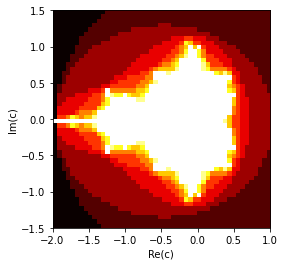

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


In [17]:
area_simulation_preset(50, np.arange(1000, 51000, 1000), 100, 'preset_n100_i50')

In [13]:
np.random.seed(0)

result1 = s_i_balancing(np.arange(1, 1010, 10), 1000, 10000, 50)
result2 = s_i_balancing(np.arange(1, 110), 1000, 10000, 50)

area_simulation_random(50, np.arange(100, 50100, 100), 100, 'randomsampling_n100_i50')
area_simulation_latin_hypercube(50, np.arange(100, 50100, 100), 100, 'latinhypercubesampling_n100_i50_2')
area_simulation_orthogonal(50, np.arange(100, 50100, 100), 100, 2, 'orthogonalsampling_n100_i50_div2')
area_simulation_orthogonal(50, np.arange(100, 50100, 100), 100, 5, 'orthogonalsampling_n100_i50_div5')



100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

42100
42200
42300
42400
42500
42600
42700
42800
42900
43000
43100
43200
43300
43400
43500
43600
43700
43800
43900
44000
44100
44200
44300
44400
44500
44600
44700
44800
44900
45000
45100
45200
45300
45400
45500
45600
45700
45800
45900
46000
46100
46200
46300
46400
46500
46600
46700
46800
46900
47000
47100
47200
47300
47400
47500
47600
47700
47800
47900
48000
48100
48200
48300
48400
48500
48600
48700
48800
48900
49000
49100
49200
49300
49400
49500
49600
49700
49800
49900
50000
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
1050